In [ ]:
# ML exploration nutcracker
# Conny Lin | June 6, 2020

In [1]:
pCapstone = '/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data'
pylibrary = '/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/brainstation_capstone/0_lib'

In [2]:
# import libraries
import os, sys, glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
# import local functions
sys.path.insert(1, pylibrary)
import BrainStationLib as bs

# Data cleaning

# load data and convert to ML dataframe

In [3]:
# load data
y = pd.read_csv(os.path.join(pCapstone, 'nutcracker_y_sample.csv'))
X = pd.read_csv(os.path.join(pCapstone, 'nutcracker_X_sample.csv'))

In [4]:
y_columns = y.columns.values
X_columns = X.columns.values

In [5]:
# make data frame to ML format
y = y.values.astype(int).transpose()
y = y[0]
X = X.values

In [6]:
y.shape

(239938,)

In [7]:
X.shape

(239938, 22)

## Split test/train set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

# scale data

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LogisticRegression

In [10]:
from sklearn.linear_model import LogisticRegression

my_logreg_model = LogisticRegression(C=0.01, random_state=318).fit(X_train_scaled, y_train)
y_predicted = my_logreg_model.predict(X_test_scaled)

print(my_logreg_model.score(X_test_scaled,y_test))
print(my_logreg_model.score(X_train_scaled,y_train))

0.9666166541635409
0.9667889209078568


# Decision Tree

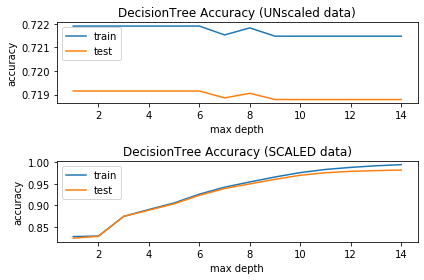

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Decision Tree -  data

train_accs = []
test_accs = []
depth_values = list(range(1,15))

# Loop over different max_depths
for d in depth_values:
    
    # Instantiate & fit
    my_dt = DecisionTreeClassifier(max_depth = d, random_state=1)
    my_dt.fit(X_train_scaled, y_train)
    
    # Evaluate on train & test data
    train_accs.append( my_dt.score(X_train, y_train) )
    test_accs.append( my_dt.score(X_test, y_test) )

    
    
# Decision Tree - scaled data

train_accs_s = []
test_accs_s = []
depth_values = list(range(1,15))

# Loop over different max_depths
for d in depth_values:
    
    # Instantiate & fit
    my_dt = DecisionTreeClassifier(max_depth = d, random_state=1)
    my_dt.fit(X_train_scaled, y_train)
    
    # Evaluate on train & test data
    train_accs_s.append( my_dt.score(X_train_scaled, y_train) )
    test_accs_s.append( my_dt.score(X_test_scaled, y_test) )

    
    
# Plot the results
plt.subplot(211) # plot unscaled classifier results
plt.plot(depth_values, train_accs, label='train')
plt.plot(depth_values, test_accs, label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('DecisionTree Accuracy (UNscaled data)')

plt.subplot(212) # plot scaled classifier results
plt.plot(depth_values, train_accs_s, label='train')
plt.plot(depth_values, test_accs_s, label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('DecisionTree Accuracy (SCALED data)')

plt.tight_layout()
plt.show()

In [12]:
depth_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [13]:
train_accs_s

[0.8277941841910976,
 0.8290742813594036,
 0.8745266617447427,
 0.8904891757365024,
 0.9056419538450546,
 0.9259984757912787,
 0.9421455619328872,
 0.9543035080616352,
 0.9658005668151183,
 0.9759818047583891,
 0.9831920264831265,
 0.9880325799614185,
 0.9917061611374408,
 0.9942961251756413]

In [14]:
test_accs_s


[0.824233836236837,
 0.8284015448306521,
 0.8746353254980411,
 0.8888472118029508,
 0.9036842543969326,
 0.9232585924258843,
 0.938998638548526,
 0.9498346808924454,
 0.9604484454446945,
 0.9698257897807785,
 0.9756189047261815,
 0.9788280403434192,
 0.9806062626767803,
 0.9818287905309661]

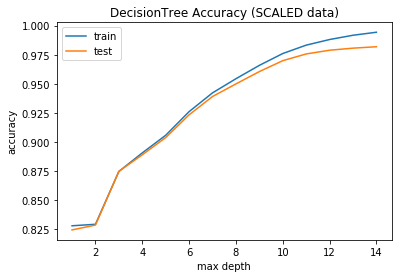

In [65]:
plt.figure()
plt.plot(depth_values, train_accs_s, label='train')
plt.plot(depth_values, test_accs_s, label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('DecisionTree Accuracy')
plt.show()

In [64]:
test_accs_s

[0.824233836236837,
 0.8284015448306521,
 0.8746353254980411,
 0.8888472118029508,
 0.9036842543969326,
 0.9232585924258843,
 0.938998638548526,
 0.9498346808924454,
 0.9604484454446945,
 0.9698257897807785,
 0.9756189047261815,
 0.9788280403434192,
 0.9806062626767803,
 0.9818287905309661]

# KNN

# SVM

# Feature eng
# PCA

# Bagging/random forest
# K means
# clustering
# NN

# Model eval

# hyper parameter tuning
# ML pipeline
# boosting